In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load trap image (RGB)
trap_img = Image.open("flower.jpeg").convert("RGB")
trap_img = trap_img.resize((600, 600))
trap_array = np.array(trap_img) / 255.0  # Normalize to [0, 1]

In [3]:
# Image settings
height, width = trap_array.shape[:2]
xmin, xmax = -2, 1.5
ymin, ymax = -1.5, 1.5
max_iter = 10000

In [4]:
# Output image
output = np.zeros((height, width, 3))  # RGB

In [9]:
for ix in range(width):
    for iy in range(height):
        x = xmin + (xmax - xmin) * ix / width
        y = ymin + (ymax - ymin) * iy / height
        c = x + 1j * y
        z = 0

        min_iter = max_iter
        trap_color = np.array([0.0, 0.0, 0.0])  # default color

        for i in range(max_iter):
            z = z*z + c
            if abs(z) > 4:
                break

            # Map z to image coordinates
            zx = int((z.real - xmin) / (xmax - xmin) * width)
            zy = int((z.imag - ymin) / (ymax - ymin) * height)

            if 0 <= zx < width and 0 <= zy < height:
                trap_color = trap_array[zy, zx]
                if i < min_iter:
                    min_iter = i
                #break  # Trap only once, you can remove this to blend across the whole orbit

        # Color based on trap color and iteration
        brightness = 1 - min_iter / max_iter
        final_color = trap_color * brightness

        output[iy, ix] = final_color

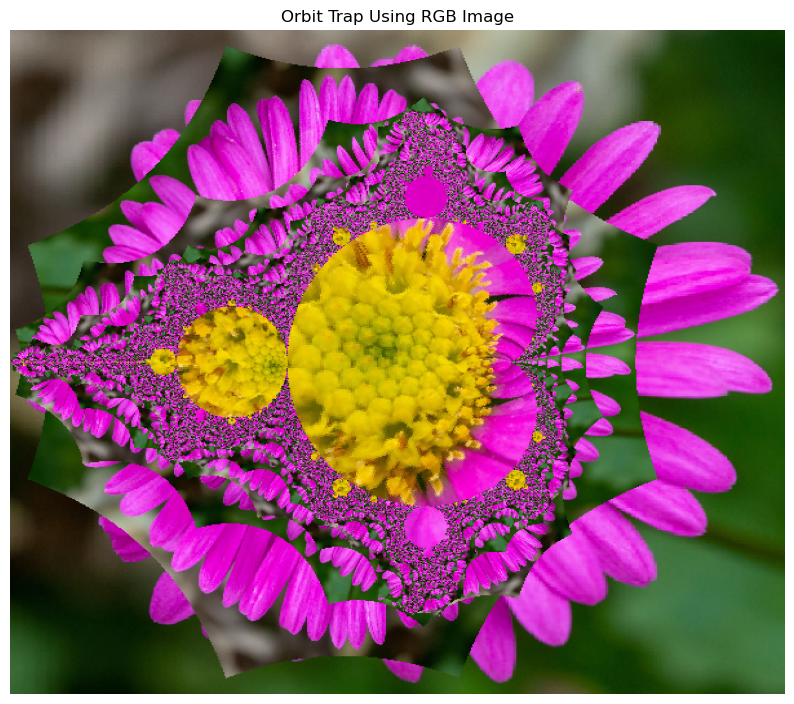

In [10]:
# Display and save the image
plt.figure(figsize=(10, 10))
plt.imshow(output, extent=[xmin, xmax, ymin, ymax])
plt.axis('off')
plt.title("Orbit Trap Using RGB Image")
plt.savefig("orbit_trap_rgb.png", dpi=300)
plt.show()